# Representaciones graficas: Plots y visualizacion de los datos


In [2]:
import pandas as pd
import matplotlib.pyplot as pl

In [3]:
data = pd.read_csv('../datasets/customer-churn-model/Customer Churn Model.txt')

In [4]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [6]:
# Para exportar los resultados
#savefig('path_donde_guardar_la_imagen.jpeg/png/jpg')

### Scatter Plot (nuve de puntos o de dispersion)

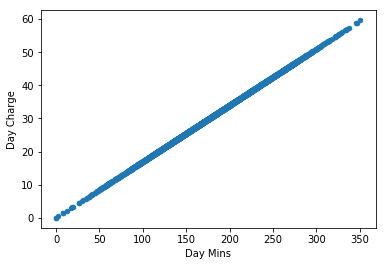

In [19]:
# kind (tipo de diagrama) = 'scatter' (nuve de puntos)
# x (eje x) = 'Day Mins' (nombre de la columna X)
# y (eje y) = 'Day Charge' (nombre de la columna Y)

fig = data.plot(kind = 'scatter', x = "Day Mins", y = 'Day Charge')


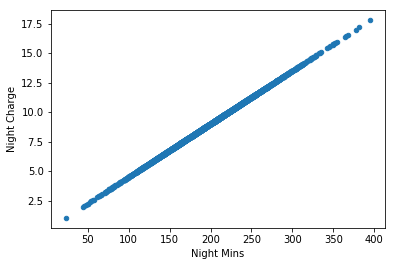

In [7]:
data.plot(kind = 'scatter', x = 'Night Mins', y = 'Night Charge')

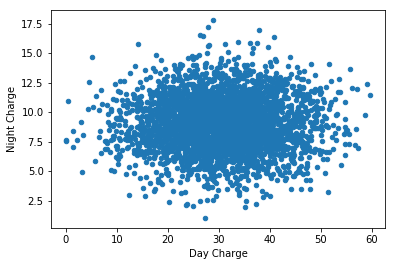

In [8]:
data.plot(kind = 'scatter', x = 'Day Charge', y = 'Night Charge')

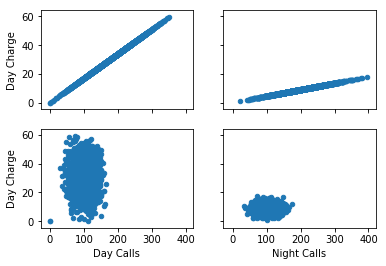

In [17]:
figure, axs = pl.subplots(2,2, sharey = True, sharex = True)
data.plot(kind = 'scatter', x = 'Day Mins', y = 'Day Charge', ax=axs[0][0])
data.plot(kind = 'scatter', x = 'Night Mins', y = 'Night Charge', ax=axs[0][1])
data.plot(kind = 'scatter', x = 'Day Calls', y = 'Day Charge', ax = axs[1][0])
data.plot(kind = 'scatter', x = 'Night Calls', y = 'Night Charge', ax = axs[1][1])

figure.savefig('./fig1.png', dpi = 1000)